In [1]:
import os
cuda = True
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
if cuda:
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
else:
    os.environ['CUDA_VISIBLE_DEVICES'] = ''

# Convolutional neural networks

In class, we have briefly reviewed the idea of learning good features directly from data and went through the concept of convolutional neural networks along with few architectures.

Until recently, building convolutional neural networks was tough. There was no high-level tools for that, you would be required to understand all the internal mechanics of the model and its operations.

Today, due to the high-level tools such as Keras and TensorFlow, everybody can build a convolutional neural network and put it to work without diving deep into them. What used to be a one-month project became a few hours exercise.


In [2]:
import pickle
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Loading the images

In [3]:
train_images, train_labels = pickle.load(open('data/train_set_all.pkl', 'rb'))
cv_images, cv_labels = pickle.load(open('data/test_set_all.pkl', 'rb'))

In [4]:
print(train_images.shape)
print(len(train_labels))

(50000, 32, 32, 3)
50000


In [5]:
print(cv_images.shape)
print(len(cv_labels))

(10000, 32, 32, 3)
10000


In [6]:
print(train_labels[0:10])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [7]:
def show_image(np_array):
    %matplotlib inline
    plt.figure()
    plt.imshow(np_array)

In [8]:
def show_example(data_set, labels, example_index):
    show_image(data_set[example_index])
    print('Label: ', labels[example_index])

Label:  6


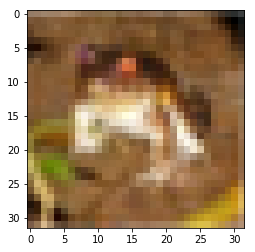

In [9]:
show_example(train_images, train_labels, example_index = 0)

Label:  3


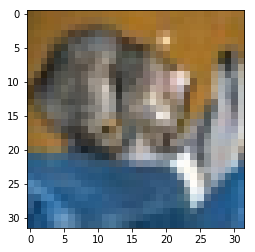

In [10]:
show_example(cv_images, cv_labels, example_index = 0)

In [ ]:
from keras.utils import np_utils
train_y = np_utils.to_categorical(train_labels, 10)
cv_y = np_utils.to_categorical(cv_labels, 10)

## Building AlexNet

In 2012 a convolutional neural network called AlexNet won ImageNet competition. 

Go through an [original AlexNet paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) to investigate the architecture. Next, investigate the [basics of Keras](https://keras.io/#keras-the-python-deep-learning-library). We will use it with TensorFlow backend.

You are also encouraged to go through some CNN tutorial for Keras. There is a number of them online (for example, [this](https://elitedatascience.com/keras-tutorial-deep-learning-in-python) or [this](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)).
Now, build AlexNex network with Keras for object recognition. Note that standard AlexNet works with 224x224 input images. The dataset you are going to use for this problem is 32x32.

In [39]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import plot_model

def create_conv_net():
    input_img = Input(shape=(32, 32, 3))

    x = Conv2D(48, (11, 11), strides=(4,4), padding='same', activation='relu')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (5, 5),  strides=(1,1), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(192, (3, 3),  strides=(1,1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3),  strides=(1,1), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3),  strides=(1,1), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Flatten()(x)
    x = Dense(2048, activation='relu')(x)
    x = Dense(2048, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(input_img, output, name="classifier")
    return model

my_model = create_conv_net()
my_model.summary()
plot_model(my_model, to_file='my_model.png', show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 48)          17472     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 48)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 4, 4, 128)         153728    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 2, 2, 192)         221376    
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 2, 2, 192)         331968    
__________

## Training AlexNet

Use training set for training the network to recognize objects. You might want to use RMSProp optimizer to speed up the training.

Convolutional networks require a lot of computing power for training. Typical setup for training CNN is to use GPU, however, in this problem you are not required to do so. CPU will be fine as well.

If you are using CPU for this subproblem, training process might be slow. You can stop it manually as soon as you get meaningful results.

Report the results on the training and cross-validation sets. The report should contain the training logs.

In [42]:
from keras.callbacks import TensorBoard

In [50]:
import shutil
shutil.rmtree('tb')

In [51]:
epoch_start = 0

In [52]:
my_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
my_model.fit(train_images, train_y,
             initial_epoch=epoch_start,
             epochs=92,
             batch_size=256,
             shuffle=True,
             validation_data=(cv_images, cv_y),
             callbacks=[TensorBoard(log_dir='tb')])

Train on 50000 samples, validate on 10000 samples
Epoch 1/92
50000/50000 [==============================] - 3s 60us/step - loss: 0.2109 - acc: 0.9364 - val_loss: 2.8450 - val_acc: 0.5734
Epoch 2/92
50000/50000 [==============================] - 3s 56us/step - loss: 0.1793 - acc: 0.9480 - val_loss: 3.0017 - val_acc: 0.5568
Epoch 3/92
50000/50000 [==============================] - 3s 55us/step - loss: 0.1959 - acc: 0.9420 - val_loss: 3.0865 - val_acc: 0.5864
Epoch 4/92
50000/50000 [==============================] - 3s 56us/step - loss: 0.1632 - acc: 0.9530 - val_loss: 2.9483 - val_acc: 0.5756
Epoch 5/92
50000/50000 [==============================] - 3s 55us/step - loss: 0.7732 - acc: 0.7675 - val_loss: 1.6902 - val_acc: 0.5427
Epoch 6/92
50000/50000 [==============================] - 3s 56us/step - loss: 0.4456 - acc: 0.8672 - val_loss: 2.3294 - val_acc: 0.5949
Epoch 7/92
50000/50000 [==============================] - 3s 57us/step - loss: 0.1870 - acc: 0.9472 - val_loss: 2.4778 - val_acc

50000/50000 [==============================] - 3s 53us/step - loss: 0.0626 - acc: 0.9889 - val_loss: 3.2843 - val_acc: 0.6201
Epoch 61/92
50000/50000 [==============================] - 3s 56us/step - loss: 0.0371 - acc: 0.9943 - val_loss: 3.5157 - val_acc: 0.6100
Epoch 62/92
50000/50000 [==============================] - 3s 57us/step - loss: 0.0416 - acc: 0.9933 - val_loss: 3.4504 - val_acc: 0.6239
Epoch 63/92
50000/50000 [==============================] - 3s 56us/step - loss: 0.0311 - acc: 0.9953 - val_loss: 3.7355 - val_acc: 0.6195
Epoch 64/92
50000/50000 [==============================] - 3s 55us/step - loss: 0.0269 - acc: 0.9954 - val_loss: 3.7134 - val_acc: 0.6138
Epoch 65/92
50000/50000 [==============================] - 3s 56us/step - loss: 0.0452 - acc: 0.9934 - val_loss: 3.6916 - val_acc: 0.6136
Epoch 66/92
50000/50000 [==============================] - 3s 57us/step - loss: 0.2144 - acc: 0.9505 - val_loss: 2.7005 - val_acc: 0.6098
Epoch 67/92
50000/50000 [=====================

In [60]:
# score = my_model.evaluate(cv_images, cv_y, verbose=1)
print('Test accuracy: {}%'.format(100*score[1]))

Test accuracy: 61.1%


## Improving AlexNet

As you can see, AlexNet does not work very well on such a small dataset. Recall what you have learned from this class to improve its performance. You can also take a look at the [Dropout technique](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) and its [implementation in Keras](https://keras.io/layers/core/#dropout). 

In [35]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import plot_model

def create_conv_net():
    input_img = Input(shape=(32, 32, 3))

    x = Conv2D(48, (3, 3), strides=(1,1), padding='same', activation='relu')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (5, 5),  strides=(1,1), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(192, (3, 3),  strides=(1,1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3),  strides=(1,1), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3),  strides=(1,1), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Flatten()(x)
    x = Dense(2048, activation='relu')(x)
    x = Dense(2048, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(input_img, output, name="classifier")
    return model

my_model = create_conv_net()
my_model.summary()
plot_model(my_model, to_file='my_model.png', show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 128)       153728    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 192)         221376    
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 192)         331968    
__________

In [37]:
my_model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
my_model.fit(train_images, train_y,
             epochs=50,
             batch_size=256,
             shuffle=True,
             validation_data=(cv_images, cv_y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 130us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 116us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 116us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
44800/50000 [=========================>....] - ETA: 0s - loss: 14.4915 - acc: 0.1009

KeyboardInterrupt: 